In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Capstone/Dataset'
os.listdir(path)

['train', 'val']

In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
input_shape = (img_width, img_height, 3)
inputs = tf.keras.Input(shape=input_shape)

model = tf.keras.Sequential([
    inputs,
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 919,460 (3.51 MB)

 Trainable params: 919,460 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size if train_generator.samples >= batch_size else train_generator.samples,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size if validation_generator.samples >= batch_size else validation_generator.samples
)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7743 - loss: 0.6085 - val_accuracy: 0.7750 - val_loss: 0.4413
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3778 - val_accuracy: 0.7000 - val_loss: 0.5385
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7783 - loss: 0.5406 - val_accuracy: 0.7281 - val_loss: 0.9174
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5625 - loss: 0.7166 - val_accuracy: 0.9000 - val_loss: 0.2719
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7629 - loss: 0.4772 - val_accuracy: 0.8687 - val_loss: 0.3443
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8438 - loss: 0.3113 - val_accuracy: 0.8000 - val_loss: 0.5959
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7855 - loss: 0.4921 - val_accuracy: 0.8438 - val_loss: 0.4092
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7500 - loss: 0.6848 - val_accuracy: 0.6000 - val_loss

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_acc))

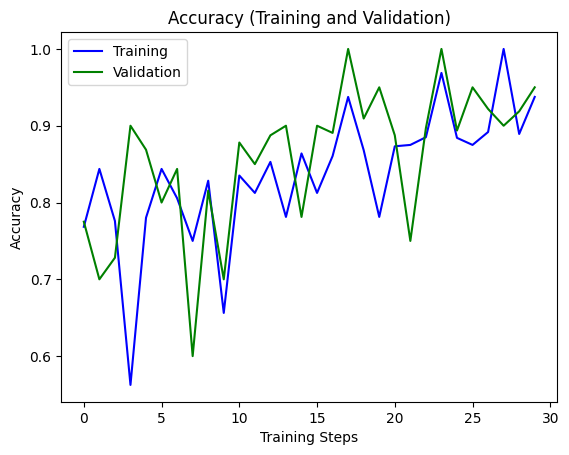

In [ ]:
plt.figure()
plt.title('Accuracy (Training and Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')

plt.plot(acc, 'b', label='Training')
plt.plot(val_acc, 'g', label='Validation')
plt.legend()

plt.show()

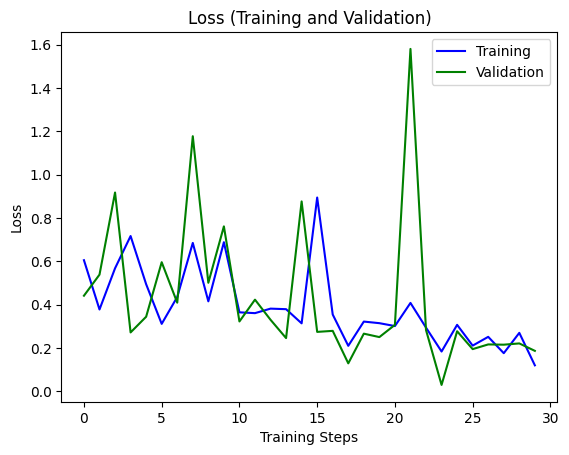

In [ ]:
plt.figure()
plt.title('Loss (Training and Validation)')
plt.ylabel('Loss')
plt.xlabel('Training Steps')

plt.plot(loss, 'b', label='Training')
plt.plot(val_loss, 'g', label='Validation')
plt.legend()

plt.show()

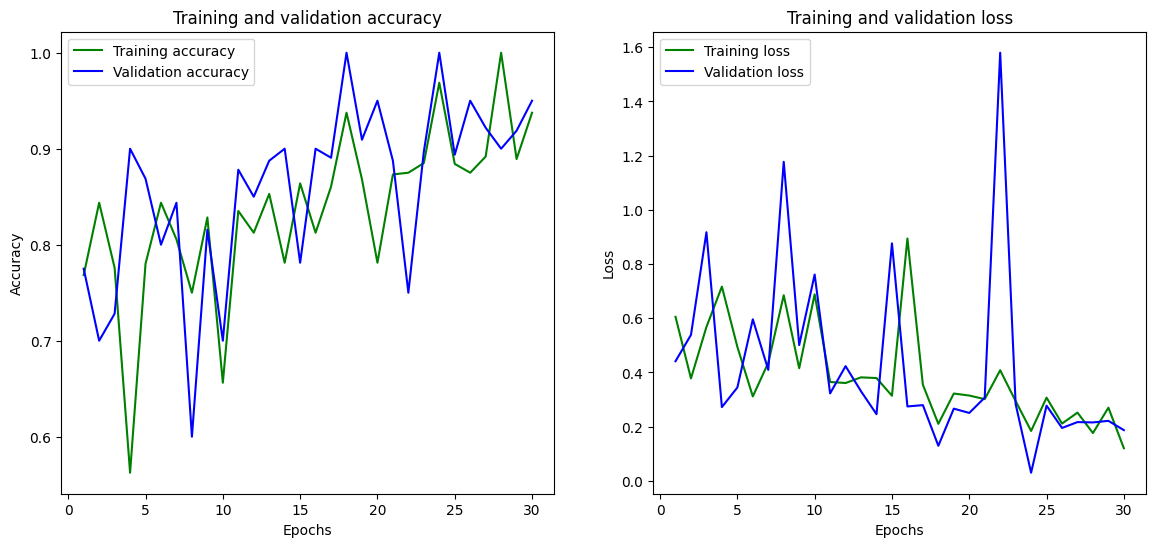

In [ ]:
# Mengambil data akurasi dan loss dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'g-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 592ms/step


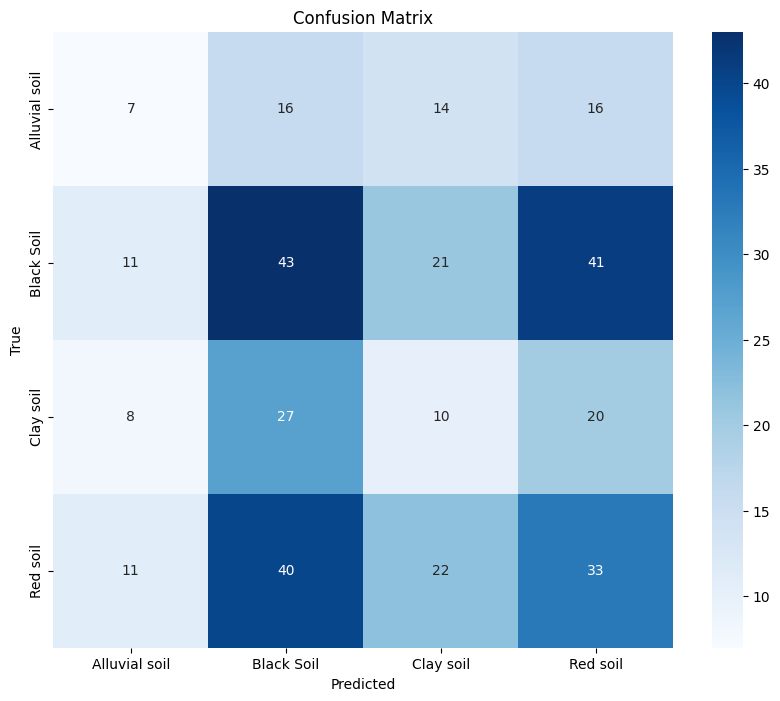

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi pada data validasi
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Mendapatkan label asli dari data validasi
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Membuat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def get_class_string_from_index(index):
    for class_string, class_index in validation_generator.class_indices.items():
        if class_index == index:
            return class_string
    return None

x_batch, y_batch = next(validation_generator)
image = x_batch[0]
true_index = np.argmax(y_batch[0])

plt.imshow(image)
plt.axis('off')
plt.show()

expanded_image = np.expand_dims(image, axis=0)
prediction_scores = model.predict(expanded_image)
predicted_index = np.argmax(prediction_scores)

true_label = get_class_string_from_index(true_index)
predicted_label = get_class_string_from_index(predicted_index)

print(f'True label: {true_label}')
print(f'Predicted label: {predicted_label}')


In [ ]:
# saved_model_path = '/content/drive/MyDrive/Capstone/Model/TanamPintar_RMSProp.h5'
# model.save('/content/drive/MyDrive/Capstone/Model/TanamPintar_RMSProp.h5')

In [ ]:
# !tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/Capstone/Model/TanamPintar_RMSProp.h5' '/content/drive/MyDrive/Capstone/Model/JSON'